In [22]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Rakesh@123455",
    database="superstore_db"
)


Project Overview
--------------------------Retail Sales Analysis using SQL and Python.----------------------------------------------------------
This notebook analyzes the Sample Superstore retail dataset to understand sales performance, profitability, discount impact, regional performance, customer behavior, and operational efficiency.
The analysis uses MySQL for data storage and SQL queries, and Python (pandas, matplotlib, seaborn) for data extraction, exploration, and visualization.

----------------------------------------------------Monthly Sales Trend-------------------------------------------------------
Business question: How do total sales and profit change over time by month?
Approach: Aggregate sales and profit by month using the Order_Date field in SQL and visualize the results with a line chart in Python.
This view helps identify seasonality, peak months, and slow periods in the sales cycle, supporting decisions around inventory planning and marketing campaigns.

C:\Users\THIS PC\AppData\Local\Temp\ipykernel_10264\1662433529.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_monthly = pd.read_sql(query_monthly, conn)


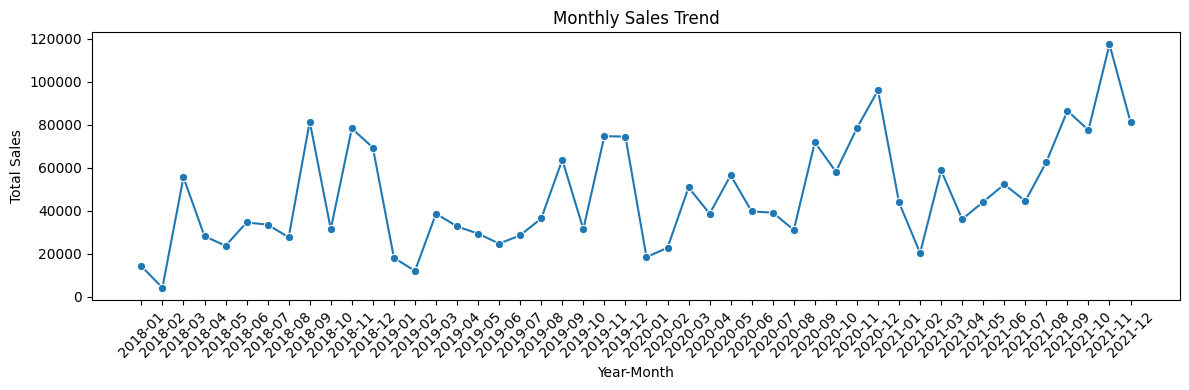

In [12]:
query_monthly = """
SELECT
    DATE_FORMAT(Order_Date, '%Y-%m') AS ym,
    SUM(Sales)  AS total_sales,
    SUM(Profit) AS total_profit
FROM orders
GROUP BY ym
ORDER BY ym;
"""

df_monthly = pd.read_sql(query_monthly, conn)
df_monthly.head()

plt.figure(figsize=(12,4))
sns.lineplot(data=df_monthly, x="ym", y="total_sales", marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


--------------------------------Top 10 Products by Sales-------------------------------------------------
Business question: Which products generate the highest revenue for the store?
Approach: Sum sales and profit by Product_Name in SQL, sort the results in descending order of sales, and display the top 10 products in a bar chart.
This reveals the key products that contribute most to revenue and can guide decisions on stock prioritization and promotional focus.

C:\Users\THIS PC\AppData\Local\Temp\ipykernel_10264\3796652947.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_products = pd.read_sql(query_top_products, conn)


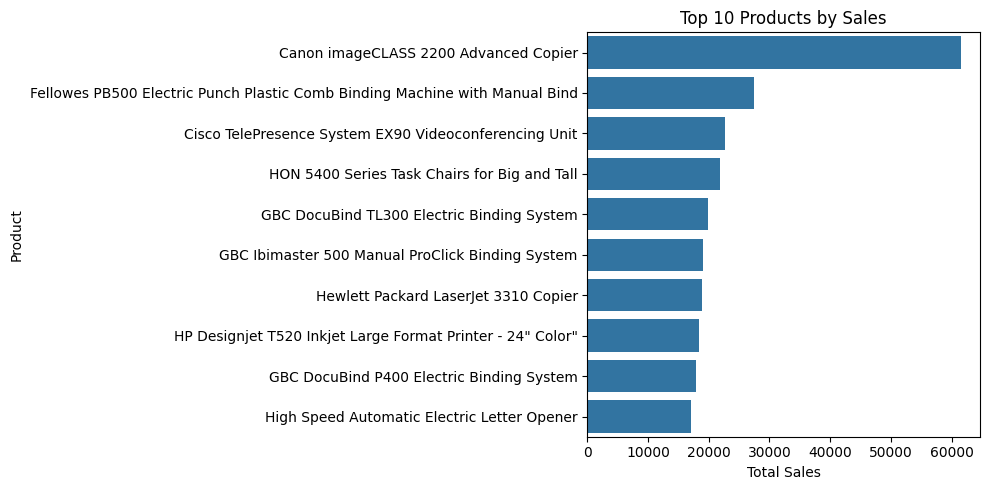

In [13]:
query_top_products = """
SELECT
    Product_Name,
    SUM(Sales)  AS total_sales,
    SUM(Profit) AS total_profit
FROM orders
GROUP BY Product_Name
ORDER BY total_sales DESC
LIMIT 10;
"""

df_top_products = pd.read_sql(query_top_products, conn)
df_top_products

plt.figure(figsize=(10,5))
sns.barplot(data=df_top_products,
            x="total_sales",
            y="Product_Name")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


-------------------------------------Sales by Region and Segment-----------------------------------------
Business question: Which regions and customer segments are driving sales?
Approach: Aggregate sales by Region and Segment using SQL and visualize the combinations as grouped bar charts in Python.
The results show which regions and segments are strongest, helping to target marketing strategies and regional resource allocation.

C:\Users\THIS PC\AppData\Local\Temp\ipykernel_10264\396145996.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_region_seg = pd.read_sql(query_region_segment, conn)


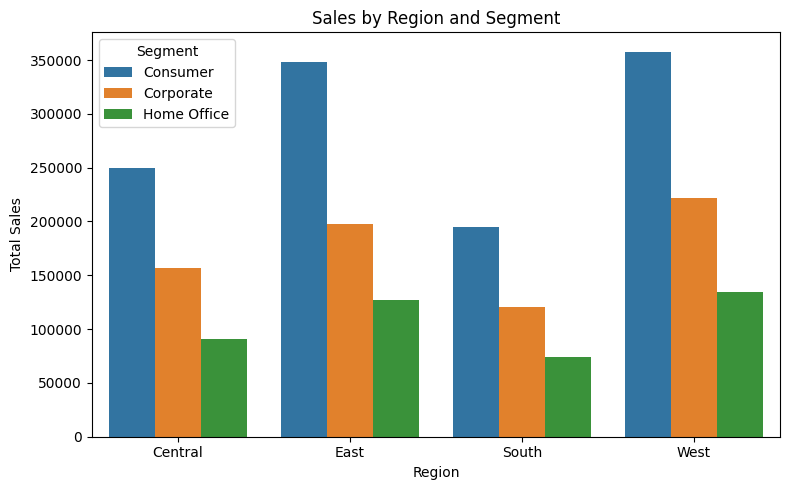

In [14]:
query_region_segment = """
SELECT
    Region,
    Segment,
    SUM(Sales) AS total_sales
FROM orders
GROUP BY Region, Segment
ORDER BY Region, total_sales DESC;
"""

df_region_seg = pd.read_sql(query_region_segment, conn)
df_region_seg

plt.figure(figsize=(8,5))
sns.barplot(data=df_region_seg,
            x="Region",
            y="total_sales",
            hue="Segment")
plt.title("Sales by Region and Segment")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


----------------------------------Discount Impact on Profit-----------------------------------------------
Business question: How do different discount levels affect profitability?
Approach: Create discount bands in SQL, compute average profit per band, and visualize the relationship between discount ranges and average profit using a bar chart.
The analysis demonstrates how aggressive discounting can reduce or even reverse profit, helping define sustainable discount strategies.

C:\Users\THIS PC\AppData\Local\Temp\ipykernel_10264\1491544206.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_discount = pd.read_sql(query_discount, conn)


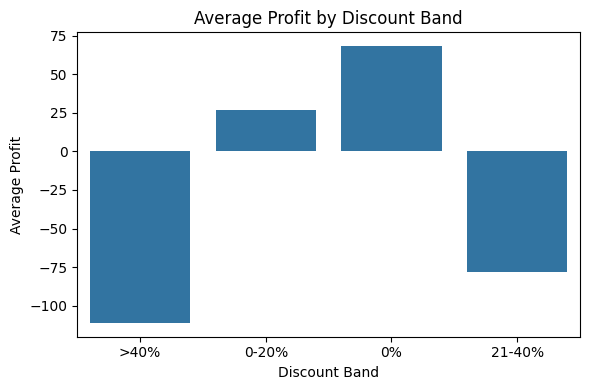

In [7]:
query_discount = """
SELECT
    CASE
        WHEN Discount = 0 THEN '0%'
        WHEN Discount BETWEEN 0.01 AND 0.20 THEN '0-20%'
        WHEN Discount BETWEEN 0.21 AND 0.40 THEN '21-40%'
        ELSE '>40%'
    END AS discount_band,
    AVG(Profit) AS avg_profit
FROM orders
GROUP BY discount_band
ORDER BY discount_band;
"""

df_discount = pd.read_sql(query_discount, conn)
df_discount


plt.figure(figsize=(6,4))
sns.barplot(data=df_discount,
            x="discount_band",
            y="avg_profit")
plt.title("Average Profit by Discount Band")
plt.xlabel("Discount Band")
plt.ylabel("Average Profit")
plt.tight_layout()
plt.show()


------------------------------------Yearly Sales and Profit--------------------------------------------
Business question: How has the business performed year over year?
Approach: Group orders by calendar year in SQL to calculate yearly totals for sales and profit, then present the results with bar charts.
This analysis highlights overall growth or decline in revenue and profitability across years, giving a high‑level view of business performance.

C:\Users\THIS PC\AppData\Local\Temp\ipykernel_10264\631577857.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_yearly = pd.read_sql(query_yearly, conn)


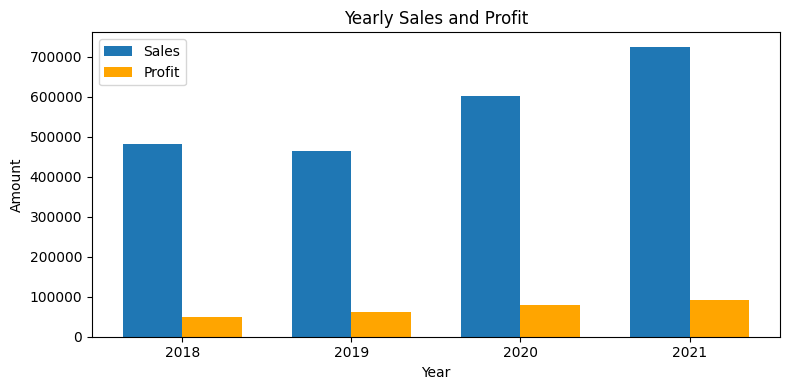

In [23]:
query_yearly = """
SELECT
    YEAR(Order_Date) AS order_year,
    SUM(Sales)       AS total_sales,
    SUM(Profit)      AS total_profit
FROM orders
GROUP BY order_year
ORDER BY order_year;
"""

df_yearly = pd.read_sql(query_yearly, conn)
df_yearly



x = np.arange(len(df_yearly["order_year"]))  # positions: 0,1,2,3
width = 0.35

plt.figure(figsize=(8,4))

plt.bar(x - width/2, df_yearly["total_sales"], width=width, label="Sales")
plt.bar(x + width/2, df_yearly["total_profit"], width=width, label="Profit", color="orange")

plt.xticks(x, df_yearly["order_year"])
plt.title("Yearly Sales and Profit")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
df_yearly


,order_year,total_sales,total_profit
0,2018,481763.83,49044.48
1,2019,464426.18,60907.79
2,2020,601265.55,80130.74
3,2021,724994.51,92775.45


----------------------------------------Profit by Sub‑Category------------------------------------------
Business question: Which product sub‑categories are the most and least profitable?
Approach: Calculate total sales and total profit by Sub_Category in SQL and plot profit values as a bar chart.
This view quickly distinguishes high‑margin sub‑categories from low‑margin or loss‑making ones, supporting assortment and pricing decisions.​



C:\Users\THIS PC\AppData\Local\Temp\ipykernel_10264\325779533.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_subcat = pd.read_sql(query_subcat, conn)
C:\Users\THIS PC\AppData\Local\Temp\ipykernel_10264\325779533.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_subcat,


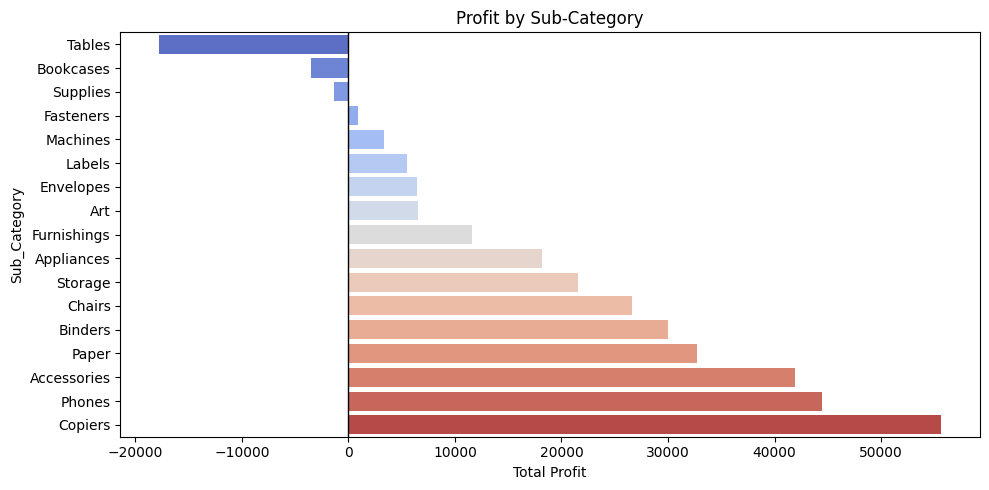

In [10]:
query_subcat = """
SELECT
    Sub_Category,
    SUM(Sales)  AS total_sales,
    SUM(Profit) AS total_profit
FROM orders
GROUP BY Sub_Category
ORDER BY total_profit;
"""

df_subcat = pd.read_sql(query_subcat, conn)
df_subcat


plt.figure(figsize=(10,5))
sns.barplot(data=df_subcat,
            x="total_profit",
            y="Sub_Category",
            palette="coolwarm")
plt.axvline(0, color="black", linewidth=1)
plt.title("Profit by Sub-Category")
plt.xlabel("Total Profit")
plt.tight_layout()
plt.show()


---------------------------------Shipping Time by Ship Mode--------------------------------------------
Business question: How long does shipping take for each shipping method?
Approach: Use DATEDIFF between Ship_Date and Order_Date in SQL to calculate shipping days and then average by Ship_Mode, plotting the results as a bar chart.
This helps compare shipping performance across modes and identify which options offer the best balance between speed and cost for customers.

C:\Users\THIS PC\AppData\Local\Temp\ipykernel_10264\4260569498.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ship = pd.read_sql(query_ship, conn)


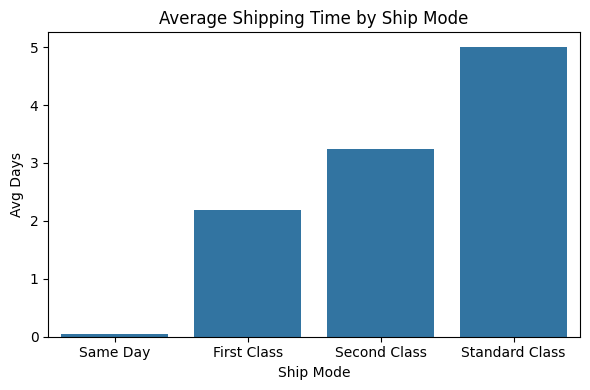

In [11]:
query_ship = """
SELECT
    Ship_Mode,
    AVG(DATEDIFF(Ship_Date, Order_Date)) AS avg_ship_days
FROM orders
GROUP BY Ship_Mode
ORDER BY avg_ship_days;
"""

df_ship = pd.read_sql(query_ship, conn)
df_ship


plt.figure(figsize=(6,4))
sns.barplot(data=df_ship, x="Ship_Mode", y="avg_ship_days")
plt.title("Average Shipping Time by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Avg Days")
plt.tight_layout()
plt.show()


----------------------------------Order Value Distribution----------------------------------------------
Business question: What is the distribution of order values across all transactions?
Approach: Aggregate total Sales per Order_ID in SQL, then plot a histogram of order values with Python to examine the spread and shape of the distribution.
This analysis shows whether revenue comes from many small baskets or fewer high‑value orders, informing pricing and bundling strategies

C:\Users\THIS PC\AppData\Local\Temp\ipykernel_10264\596979790.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_order_value = pd.read_sql(query_order_value, conn)


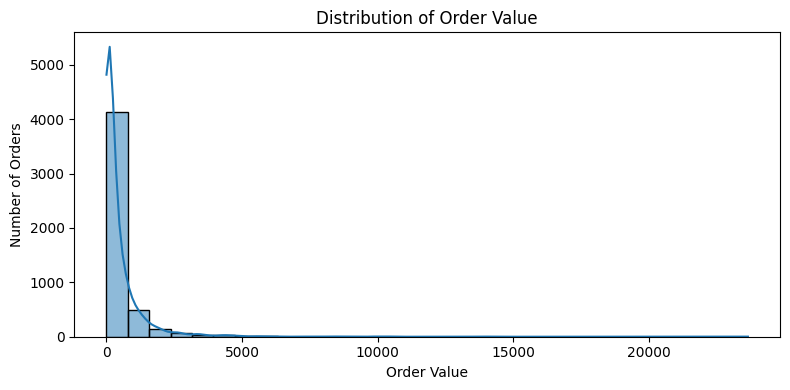

In [15]:
query_order_value = """
SELECT
    Order_ID,
    SUM(Sales) AS order_value
FROM orders
GROUP BY Order_ID;
"""

df_order_value = pd.read_sql(query_order_value, conn)


plt.figure(figsize=(8,4))
sns.histplot(df_order_value["order_value"], bins=30, kde=True)
plt.title("Distribution of Order Value")
plt.xlabel("Order Value")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


---------------------------Sales vs Profit by Category----------------------------------------------
Business question: How do individual transactions balance sales and profit across different product categories?
Approach: Query Sales, Profit, and Category for each order line and plot a scatter chart with Sales on the x‑axis, Profit on the y‑axis, and color representing Category.
This visualization shows how profitable high‑ and low‑value transactions are within each category, helping identify patterns such as high‑sales but low‑profit categories or orders that consistently generate losses.​

C:\Users\THIS PC\AppData\Local\Temp\ipykernel_10264\750271239.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sales_profit = pd.read_sql(query_sales_profit, conn)


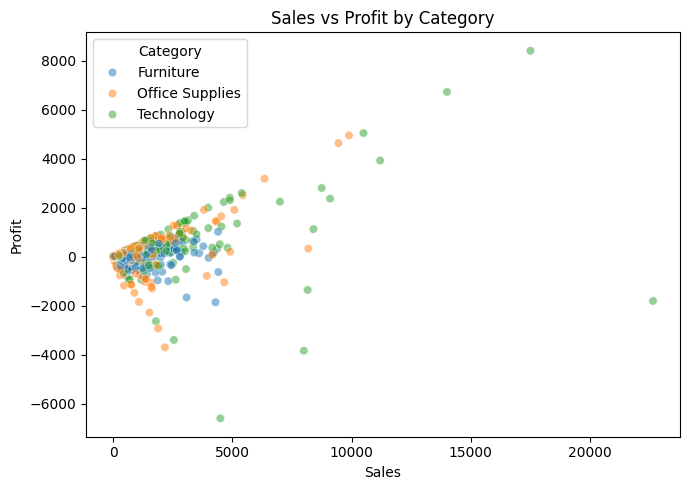

In [16]:
query_sales_profit = """
SELECT Sales, Profit, Category
FROM orders;
"""

df_sales_profit = pd.read_sql(query_sales_profit, conn)

plt.figure(figsize=(7,5))
sns.scatterplot(data=df_sales_profit,
                x="Sales", y="Profit",
                hue="Category", alpha=0.5)
plt.title("Sales vs Profit by Category")
plt.tight_layout()
plt.show()


----------------------Sales vs Profit and Correlation Analysis----------------------------------------
Business question: How are sales, quantity, discount, and profit related to each other?
Approach: Extract Sales, Quantity, Discount, and Profit from SQL, create scatter plots for sales versus profit, and compute a correlation matrix visualized as a heatmap.
These visuals reveal how strongly discount is associated with profit, and how sales levels relate to profitability, helping to understand trade‑offs between volume and margin.

C:\Users\THIS PC\AppData\Local\Temp\ipykernel_10264\2414727724.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sales_profit = pd.read_sql(query_sales_profit, conn)


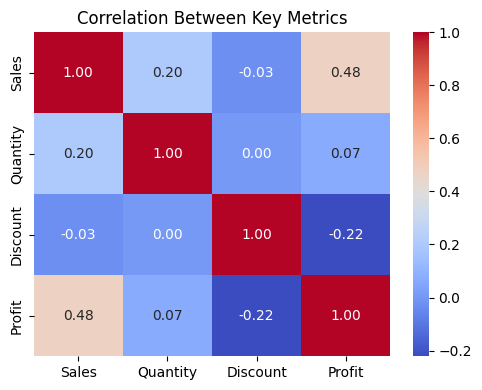

In [18]:
query_sales_profit = """
SELECT Sales, Profit, Quantity, Discount
FROM orders;
"""

df_sales_profit = pd.read_sql(query_sales_profit, conn)


numeric_cols = ["Sales", "Quantity", "Discount", "Profit"]
corr = df_sales_profit[numeric_cols].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Key Metrics")
plt.tight_layout()
plt.show()


---------------------------Summary of Key Insights----------------------------------------------
The combined SQL and Python analysis delivers a complete view of retail performance for the Sample Superstore dataset.
It highlights time‑based trends, top‑performing products, profitable and unprofitable categories, high‑value segments and regions, the impact of discounting on profit, and operational aspects such as shipping time.